# I. Preparation

In [8]:
import os
from math import sqrt

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from statistics import stdev

from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [9]:
os.getcwd()

'C:\\Users\\ThinkPad'

# II. Statistics
## 1. Compare frequency ranges for model fitting

In [10]:
# Table 1: Compare power [10-50] vs [30-50]
power_10_50 = [0.043, 0.047, 0.057, 0.054]
power_30_50 = [0.058, 0.07, 0.083, 0.076]
print(stdev(power_10_50))
print(stdev(power_30_50))

# T test with unequal variances
print(ttest_ind(power_10_50, power_30_50, equal_var = False))

0.0063966136874651644
0.010594810050208545
Ttest_indResult(statistic=-3.474452070845224, pvalue=0.018171187300598676)


## 2. Compare performance indicators between tables

In [11]:
# Table 2 vs table 3: Low vs Mid
performance_table2 = pd.read_csv("performance_table2.csv")
performance_table3 = pd.read_csv("performance_table3.csv")
performance_table23 = pd.concat([performance_table2, performance_table3])

## ANOVA and Tukey's test 
# Accuracy
model = ols('accuracy ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table23).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table23['accuracy'],
                          groups=performance_table23['table'],
                          alpha=0.05)
print(tukey)

# Precision
model = ols('precision ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table23).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table23['precision'],
                          groups=performance_table23['table'],
                          alpha=0.05)
print(tukey)

# Recall
model = ols('recall ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table23).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table23['recall'],
                          groups=performance_table23['table'],
                          alpha=0.05)
print(tukey)

,sum_sq,df,F,PR(>F)
C(classifier),0.394046,4.0,23.045808,7.087303e-13
C(n_channels),0.452929,1.0,105.958336,1.504635e-16
C(table),1.018081,1.0,238.170153,3.037320e-26
C(classifier):C(n_channels),0.065946,4.0,3.856856,6.316910e-03
C(classifier):C(table),0.106214,4.0,6.211933,1.986641e-04
C(n_channels):C(table),0.061009,1.0,14.272462,2.945607e-04
Residual,0.359066,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     2      3   0.2018 0.001 0.1537 0.2499   True
-------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),0.455830,4.0,8.528917,7.963638e-06
C(n_channels),0.326041,1.0,24.401875,3.931463e-06
C(table),0.525625,1.0,39.339333,1.478805e-08
C(classifier):C(n_channels),0.021394,4.0,0.400298,8.079179e-01
C(classifier):C(table),0.122410,4.0,2.290382,6.636434e-02
C(n_channels):C(table),0.070225,1.0,5.255847,2.437331e-02
Residual,1.122350,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     2      3    0.145 0.001 0.0866 0.2034   True
-------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),0.394046,4.0,23.045808,7.087303e-13
C(n_channels),0.452929,1.0,105.958336,1.504635e-16
C(table),1.018081,1.0,238.170153,3.037320e-26
C(classifier):C(n_channels),0.065946,4.0,3.856856,6.316910e-03
C(classifier):C(table),0.106214,4.0,6.211933,1.986641e-04
C(n_channels):C(table),0.061009,1.0,14.272462,2.945607e-04
Residual,0.359066,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     2      3   0.2018 0.001 0.1537 0.2499   True
-------------------------------------------------


In [12]:
# Table 3 vs table 4: 4 vs 3 targets
performance_table3 = pd.read_csv("performance_table3.csv")
performance_table4 = pd.read_csv("performance_table4.csv")
performance_table34 = pd.concat([performance_table3, performance_table4])

## ANOVA and Tukey's test 
# Accuracy
model = ols('accuracy ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table34).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table34['accuracy'],
                          groups=performance_table34['table'],
                          alpha=0.05)
print(tukey)

# Precision
model = ols('precision ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table34).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table34['precision'],
                          groups=performance_table34['table'],
                          alpha=0.05)
print(tukey)

# Recall
model = ols('recall ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table34).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table34['recall'],
                          groups=performance_table34['table'],
                          alpha=0.05)
print(tukey)

,sum_sq,df,F,PR(>F)
C(classifier),0.732296,4.0,36.583443,1.103887e-17
C(n_channels),0.207936,1.0,41.551584,6.888771e-09
C(table),0.456976,1.0,91.316928,4.515878e-15
C(classifier):C(n_channels),0.012024,4.0,0.600685,6.631716e-01
C(classifier):C(table),0.017384,4.0,0.868456,4.864348e-01
C(n_channels):C(table),0.000900,1.0,0.179846,6.725898e-01
Residual,0.420360,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     3      4   0.1352 0.001 0.0879 0.1825   True
-------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),0.564584,4.0,21.162075,4.270717e-12
C(n_channels),0.148996,1.0,22.339028,9.092107e-06
C(table),0.341056,1.0,51.134659,2.945229e-10
C(classifier):C(n_channels),0.018824,4.0,0.705572,5.903363e-01
C(classifier):C(table),0.028484,4.0,1.067654,3.777291e-01
C(n_channels):C(table),0.006400,1.0,0.959554,3.301120e-01
Residual,0.560260,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper reject
------------------------------------------------
     3      4   0.1168 0.001 0.0706 0.163   True
------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),0.732296,4.0,36.583443,1.103887e-17
C(n_channels),0.207936,1.0,41.551584,6.888771e-09
C(table),0.456976,1.0,91.316928,4.515878e-15
C(classifier):C(n_channels),0.012024,4.0,0.600685,6.631716e-01
C(classifier):C(table),0.017384,4.0,0.868456,4.864348e-01
C(n_channels):C(table),0.000900,1.0,0.179846,6.725898e-01
Residual,0.420360,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     3      4   0.1352 0.001 0.0879 0.1825   True
-------------------------------------------------


In [13]:
# Table 2 vs table 5: Low vs High
performance_table2 = pd.read_csv("performance_table2.csv")
performance_table5 = pd.read_csv("performance_table5.csv")
performance_table25 = pd.concat([performance_table2, performance_table5])

## ANOVA and Tukey's test 
# Accuracy
model = ols('accuracy ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table25).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table25['accuracy'],
                          groups=performance_table25['table'],
                          alpha=0.05)
print(tukey)

# Precision
model = ols('precision ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table25).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table25['precision'],
                          groups=performance_table25['table'],
                          alpha=0.05)
print(tukey)

# Recall
model = ols('recall ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table25).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table25['recall'],
                          groups=performance_table25['table'],
                          alpha=0.05)
print(tukey)

,sum_sq,df,F,PR(>F)
C(classifier),0.372836,4.0,19.733534,1.756147e-11
C(n_channels),0.373321,1.0,79.036818,9.868534e-14
C(table),0.279841,1.0,59.245909,2.441200e-11
C(classifier):C(n_channels),0.043424,4.0,2.298354,6.558251e-02
C(classifier):C(table),0.077944,4.0,4.125435,4.225266e-03
C(n_channels):C(table),0.095481,1.0,20.214546,2.200046e-05
Residual,0.396764,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper  reject
------------------------------------------------
     2      5   0.1058 0.001 0.059 0.1526   True
------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),0.437896,4.0,7.721244,0.000024
C(n_channels),0.346921,1.0,24.468473,0.000004
C(table),0.056169,1.0,3.961621,0.049801
C(classifier):C(n_channels),0.056424,4.0,0.994902,0.415005
C(classifier):C(table),0.102616,4.0,1.809387,0.134616
C(n_channels):C(table),0.061009,1.0,4.302988,0.041107
Residual,1.190976,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     2      5   0.0474 0.1166 -0.012 0.1068  False
--------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),0.372836,4.0,19.733534,1.756147e-11
C(n_channels),0.373321,1.0,79.036818,9.868534e-14
C(table),0.279841,1.0,59.245909,2.441200e-11
C(classifier):C(n_channels),0.043424,4.0,2.298354,6.558251e-02
C(classifier):C(table),0.077944,4.0,4.125435,4.225266e-03
C(n_channels):C(table),0.095481,1.0,20.214546,2.200046e-05
Residual,0.396764,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper  reject
------------------------------------------------
     2      5   0.1058 0.001 0.059 0.1526   True
------------------------------------------------


In [14]:
# Table 3 vs table 5: Mid vs High
performance_table3 = pd.read_csv("performance_table3.csv")
performance_table5 = pd.read_csv("performance_table5.csv")
performance_table35 = pd.concat([performance_table3, performance_table5])

## ANOVA and Tukey's test 
# Accuracy
model = ols('accuracy ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table35).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table35['accuracy'],
                          groups=performance_table35['table'],
                          alpha=0.05)
print(tukey)

# Precision
model = ols('precision ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table35).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table35['precision'],
                          groups=performance_table35['table'],
                          alpha=0.05)
print(tukey)

# Recall
model = ols('recall ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table35).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table35['recall'],
                          groups=performance_table35['table'],
                          alpha=0.05)
print(tukey)

,sum_sq,df,F,PR(>F)
C(classifier),0.795304,4.0,48.978240,3.369623e-21
C(n_channels),0.132496,1.0,32.638694,1.641494e-07
C(table),0.230400,1.0,56.756091,5.160111e-11
C(classifier):C(n_channels),0.015404,4.0,0.948645,4.401587e-01
C(classifier):C(table),0.014680,4.0,0.904058,4.654741e-01
C(n_channels):C(table),0.003844,1.0,0.946920,3.332984e-01
Residual,0.340996,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     3      5   -0.096 0.001 -0.1418 -0.0502   True
---------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),0.671566,4.0,25.955627,5.086714e-14
C(n_channels),0.104976,1.0,16.229040,1.226758e-04
C(table),0.238144,1.0,36.816496,3.598490e-08
C(classifier):C(n_channels),0.012854,4.0,0.496799,7.381032e-01
C(classifier):C(table),0.013426,4.0,0.518907,7.220374e-01
C(n_channels):C(table),0.000324,1.0,0.050090,8.234508e-01
Residual,0.543346,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     3      5  -0.0976 0.001 -0.1441 -0.0511   True
---------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),0.795304,4.0,48.978240,3.369623e-21
C(n_channels),0.132496,1.0,32.638694,1.641494e-07
C(table),0.230400,1.0,56.756091,5.160111e-11
C(classifier):C(n_channels),0.015404,4.0,0.948645,4.401587e-01
C(classifier):C(table),0.014680,4.0,0.904058,4.654741e-01
C(n_channels):C(table),0.003844,1.0,0.946920,3.332984e-01
Residual,0.340996,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     3      5   -0.096 0.001 -0.1418 -0.0502   True
---------------------------------------------------


In [15]:
# Table 3 vs table 6: Mid first order vs first and second order
performance_table3 = pd.read_csv("performance_table3.csv")
performance_table6 = pd.read_csv("performance_table6.csv")
performance_table36 = pd.concat([performance_table3, performance_table6])

## ANOVA and Tukey's test 
# Accuracy
model = ols('accuracy ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table36).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table36['accuracy'],
                          groups=performance_table36['table'],
                          alpha=0.05)
print(tukey)

# Precision
model = ols('precision ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table36).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table36['precision'],
                          groups=performance_table36['table'],
                          alpha=0.05)
print(tukey)

# Recall
model = ols('recall ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table36).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table36['recall'],
                          groups=performance_table36['table'],
                          alpha=0.05)
print(tukey)

,sum_sq,df,F,PR(>F)
C(classifier),2.091754,4.0,49.476955,7.573951e-22
C(n_channels),0.574768,1.0,54.380739,8.185923e-11
C(table),0.292033,1.0,27.630189,9.983387e-07
C(classifier):C(n_channels),0.304514,4.0,7.202782,4.518319e-05
C(classifier):C(table),0.317590,4.0,7.512058,2.922000e-05
C(n_channels):C(table),0.112106,1.0,10.606698,1.595293e-03
Residual,0.940671,89.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     3      6  -0.1175 0.0036 -0.1957 -0.0393   True
----------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),1.590635,4.0,24.035055,1.683581e-13
C(n_channels),0.351102,1.0,21.221108,1.357376e-05
C(table),0.294163,1.0,17.779632,5.944605e-05
C(classifier):C(n_channels),0.183702,4.0,2.775803,3.172493e-02
C(classifier):C(table),0.420316,4.0,6.351127,1.526965e-04
C(n_channels):C(table),0.079683,1.0,4.816146,3.079789e-02
Residual,1.472500,89.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     3      6  -0.1172 0.0029 -0.1934 -0.041   True
---------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),2.091754,4.0,49.476955,7.573951e-22
C(n_channels),0.574768,1.0,54.380739,8.185923e-11
C(table),0.292033,1.0,27.630189,9.983387e-07
C(classifier):C(n_channels),0.304514,4.0,7.202782,4.518319e-05
C(classifier):C(table),0.317590,4.0,7.512058,2.922000e-05
C(n_channels):C(table),0.112106,1.0,10.606698,1.595293e-03
Residual,0.940671,89.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     3      6  -0.1175 0.0036 -0.1957 -0.0393   True
----------------------------------------------------


In [16]:
# Table 5 vs table 7: 4 vs 8 targets
performance_table5 = pd.read_csv("performance_table5.csv")
performance_table7 = pd.read_csv("performance_table7.csv")
performance_table57 = pd.concat([performance_table5, performance_table7])

## ANOVA and Tukey's test 
# Accuracy
model = ols('accuracy ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table57).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table57['accuracy'],
                          groups=performance_table57['table'],
                          alpha=0.05)
print(tukey)

# Precision
model = ols('precision ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table57).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table57['precision'],
                          groups=performance_table57['table'],
                          alpha=0.05)
print(tukey)

# Recall
model = ols('recall ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table57).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table57['recall'],
                          groups=performance_table57['table'],
                          alpha=0.05)
print(tukey)

,sum_sq,df,F,PR(>F)
C(classifier),1.336170,4.0,106.427347,4.671183e-32
C(n_channels),0.040804,1.0,13.000326,5.273099e-04
C(table),0.034596,1.0,11.022431,1.333153e-03
C(classifier):C(n_channels),0.003366,4.0,0.268105,8.977104e-01
C(classifier):C(table),0.108214,4.0,8.619359,7.052382e-06
C(n_channels):C(table),0.010000,1.0,3.186042,7.787961e-02
Residual,0.263650,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
     5      7  -0.0372 0.1686 -0.0904 0.016  False
--------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),1.034536,4.0,48.323878,4.980180e-21
C(n_channels),0.041616,1.0,7.775646,6.548807e-03
C(table),0.009216,1.0,1.721942,1.930177e-01
C(classifier):C(n_channels),0.002184,4.0,0.102016,9.814917e-01
C(classifier):C(table),0.069064,4.0,3.226026,1.630923e-02
C(n_channels):C(table),0.019044,1.0,3.558233,6.270619e-02
Residual,0.449576,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     5      7  -0.0192 0.4565 -0.0702 0.0318  False
---------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),1.336170,4.0,106.427347,4.671183e-32
C(n_channels),0.040804,1.0,13.000326,5.273099e-04
C(table),0.034596,1.0,11.022431,1.333153e-03
C(classifier):C(n_channels),0.003366,4.0,0.268105,8.977104e-01
C(classifier):C(table),0.108214,4.0,8.619359,7.052382e-06
C(n_channels):C(table),0.010000,1.0,3.186042,7.787961e-02
Residual,0.263650,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
     5      7  -0.0372 0.1686 -0.0904 0.016  False
--------------------------------------------------


In [17]:
# Table 2 vs table 8: Low first order vs first, second and third order
performance_table2 = pd.read_csv("performance_table2.csv")
performance_table8 = pd.read_csv("performance_table8.csv")
performance_table28 = pd.concat([performance_table2, performance_table8])

## ANOVA and Tukey's test 
# Accuracy
model = ols('accuracy ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table28).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table28['accuracy'],
                          groups=performance_table28['table'],
                          alpha=0.05)
print(tukey)

# Precision
model = ols('precision ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table28).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table28['precision'],
                          groups=performance_table28['table'],
                          alpha=0.05)
print(tukey)

# Recall
model = ols('recall ~ C(classifier) + C(n_channels) + C(table) + \
            C(classifier):C(n_channels) + C(classifier):C(table) + C(n_channels):C(table)', \
            data=performance_table28).fit()
display(sm.stats.anova_lm(model, typ=2))
tukey = pairwise_tukeyhsd(endog=performance_table28['recall'],
                          groups=performance_table28['table'],
                          alpha=0.05)
print(tukey)

,sum_sq,df,F,PR(>F)
C(classifier),0.153696,4.0,11.677506,1.377588e-07
C(n_channels),0.659344,1.0,200.382408,5.864791e-24
C(table),0.001936,1.0,0.588373,4.451995e-01
C(classifier):C(n_channels),0.143836,4.0,10.928364,3.504486e-07
C(classifier):C(table),0.014704,4.0,1.117180,3.539354e-01
C(n_channels):C(table),0.011664,1.0,3.544827,6.319300e-02
Residual,0.276396,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     2      8   0.0088 0.7097 -0.0362 0.0538  False
---------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),0.172766,4.0,3.414007,1.228933e-02
C(n_channels),0.529984,1.0,41.891789,6.133024e-09
C(table),0.094864,1.0,7.498382,7.538073e-03
C(classifier):C(n_channels),0.062786,4.0,1.240706,2.999886e-01
C(classifier):C(table),0.126246,4.0,2.494731,4.893463e-02
C(n_channels):C(table),0.011664,1.0,0.921963,3.397157e-01
Residual,1.062706,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     2      8  -0.0616 0.0321 -0.1178 -0.0054   True
----------------------------------------------------


,sum_sq,df,F,PR(>F)
C(classifier),0.153696,4.0,11.677506,1.377588e-07
C(n_channels),0.659344,1.0,200.382408,5.864791e-24
C(table),0.001936,1.0,0.588373,4.451995e-01
C(classifier):C(n_channels),0.143836,4.0,10.928364,3.504486e-07
C(classifier):C(table),0.014704,4.0,1.117180,3.539354e-01
C(n_channels):C(table),0.011664,1.0,3.544827,6.319300e-02
Residual,0.276396,84.0,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     2      8   0.0088 0.7097 -0.0362 0.0538  False
---------------------------------------------------


## 3. Compare Random Forest to Canonical Correlation Analysis

In [22]:
accuracy_LOW_13 = pd.read_csv("accuracy_LOW_13.csv")
accuracy_LOW_3 = pd.read_csv("accuracy_LOW_3.csv")
accuracy_MID_13 = pd.read_csv("accuracy_MID_13.csv")
accuracy_MID_3 = pd.read_csv("accuracy_MID_3.csv")
accuracy_HIGH_13 = pd.read_csv("accuracy_HIGH_13.csv")
accuracy_HIGH_3 = pd.read_csv("accuracy_HIGH_3.csv")
accuracy_3_13 = pd.read_csv("accuracy_3_13.csv")
accuracy_3_3 = pd.read_csv("accuracy_3_3.csv")

# Compare RF to CCA: LOW 13
print(ttest_ind(performance_table2[(performance_table2['classifier']=='RF') & \
                                   (performance_table2['n_channels']==13)]['accuracy'].tolist(), \
                accuracy_LOW_13.values.tolist()[0], equal_var = False))

# Compare RF to CCA: LOW 3
print(ttest_ind(performance_table2[(performance_table2['classifier']=='RF') & \
                                   (performance_table2['n_channels']==3)]['accuracy'].tolist(), \
                accuracy_LOW_3.values.tolist()[0], equal_var = False))

# Compare RF to CCA: MID 13
print(ttest_ind(performance_table3[(performance_table3['classifier']=='RF') & \
                                   (performance_table3['n_channels']==13)]['accuracy'].tolist(), \
                accuracy_MID_13.values.tolist()[0], equal_var = False))

# Compare RF to CCA: MID 3
print(ttest_ind(performance_table3[(performance_table3['classifier']=='RF') & \
                                   (performance_table3['n_channels']==3)]['accuracy'].tolist(), \
                accuracy_MID_3.values.tolist()[0], equal_var = False))

# Compare RF to CCA: MID 3 targets 13
print(ttest_ind(performance_table4[(performance_table4['classifier']=='RF') & \
                                   (performance_table4['n_channels']==13)]['accuracy'].tolist(), \
                accuracy_3_13.values.tolist()[0], equal_var = False))

# Compare RF to CCA: MID 3 targets 3
print(ttest_ind(performance_table4[(performance_table4['classifier']=='RF') & \
                                   (performance_table4['n_channels']==3)]['accuracy'].tolist(), \
                accuracy_3_3.values.tolist()[0], equal_var = False))

# Compare RF to CCA: HIGH 13
print(ttest_ind(performance_table5[(performance_table5['classifier']=='RF') & \
                                   (performance_table5['n_channels']==13)]['accuracy'].tolist(), \
                accuracy_HIGH_13.values.tolist()[0], equal_var = False))

# Compare RF to CCA: HIGH 3
print(ttest_ind(performance_table5[(performance_table5['classifier']=='RF') & \
                                   (performance_table5['n_channels']==13)]['accuracy'].tolist(), \
                accuracy_HIGH_3.values.tolist()[0], equal_var = False))

# display(accuracy_LOW_3.values.tolist()[0])
# print(performance_table2[(performance_table2['classifier']=='RF') & \
#                                    (performance_table2['n_channels']==13)]['accuracy'].tolist())

Ttest_indResult(statistic=-9.76957127517457, pvalue=0.00033678026878285986)
Ttest_indResult(statistic=-2.373003721178122, pvalue=0.06606598505124554)
Ttest_indResult(statistic=-3.014627942725689, pvalue=0.03558704211552846)
Ttest_indResult(statistic=-5.31507593505053, pvalue=0.0023313553861863826)
Ttest_indResult(statistic=-0.2839165635790449, pvalue=0.7878661495677932)
Ttest_indResult(statistic=-0.027236898544939835, pvalue=0.9790563543815273)
Ttest_indResult(statistic=-10.662701604810374, pvalue=1.116767026603928e-05)
Ttest_indResult(statistic=-9.080198635050056, pvalue=8.478357786261212e-06)


# III. Visualisation
## 1. Bar plot comparing accuracies

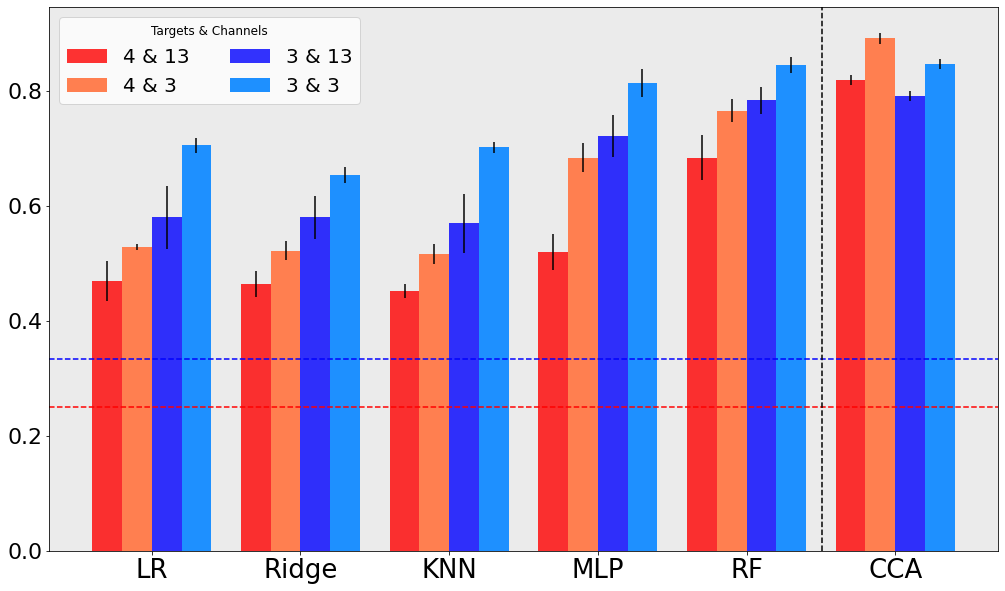

In [35]:
# Mid freqs, 4 or 3 targets, 3 or 13 channels
targets4_channels_13 = [np.mean(performance_table3[(performance_table3['classifier']=='log') & \
                                                   (performance_table3['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table3[(performance_table3['classifier']=='ridge') & \
                                                   (performance_table3['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table3[(performance_table3['classifier']=='KNN') & \
                                                   (performance_table3['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table3[(performance_table3['classifier']=='MLP') & \
                                                   (performance_table3['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table3[(performance_table3['classifier']=='RF') & \
                                                   (performance_table3['n_channels']==13)]['accuracy'], axis=0), \
                        accuracy_MID_13.mean(axis=1)[0]]
targets4_channels_3 = [np.mean(performance_table3[(performance_table3['classifier']=='log') & \
                                                  (performance_table3['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table3[(performance_table3['classifier']=='ridge') & \
                                                   (performance_table3['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table3[(performance_table3['classifier']=='KNN') & \
                                                   (performance_table3['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table3[(performance_table3['classifier']=='MLP') & \
                                                   (performance_table3['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table3[(performance_table3['classifier']=='RF') & \
                                                   (performance_table3['n_channels']==3)]['accuracy'], axis=0), \
                       accuracy_MID_3.mean(axis=1)[0]]
targets3_channels_13 = [np.mean(performance_table4[(performance_table4['classifier']=='log') & \
                                                   (performance_table4['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table4[(performance_table4['classifier']=='ridge') & \
                                                   (performance_table4['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table4[(performance_table4['classifier']=='KNN') & \
                                                   (performance_table4['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table4[(performance_table4['classifier']=='MLP') & \
                                                   (performance_table4['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table4[(performance_table4['classifier']=='RF') & \
                                                   (performance_table4['n_channels']==13)]['accuracy'], axis=0), \
                        accuracy_3_13.mean(axis=1)[0]]
targets3_channels_3 = [np.mean(performance_table4[(performance_table4['classifier']=='log') & \
                                                  (performance_table4['n_channels']==3)]['accuracy'], axis=0), \
                       np.mean(performance_table4[(performance_table4['classifier']=='ridge') & \
                                                   (performance_table4['n_channels']==3)]['accuracy'], axis=0), \
                       np.mean(performance_table4[(performance_table4['classifier']=='KNN') & \
                                                   (performance_table4['n_channels']==3)]['accuracy'], axis=0), \
                       np.mean(performance_table4[(performance_table4['classifier']=='MLP') & \
                                                   (performance_table4['n_channels']==3)]['accuracy'], axis=0), \
                       np.mean(performance_table4[(performance_table4['classifier']=='RF') & \
                                                   (performance_table4['n_channels']==3)]['accuracy'], axis=0), \
                       accuracy_3_3.mean(axis=1)[0]]

targets4_channels_13_std = [np.std(performance_table3[(performance_table3['classifier']=='log') & \
                                                      (performance_table3['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table3[(performance_table3['classifier']=='ridge') & \
                                                      (performance_table3['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table3[(performance_table3['classifier']=='KNN') & \
                                                      (performance_table3['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table3[(performance_table3['classifier']=='MLP') & \
                                                      (performance_table3['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table3[(performance_table3['classifier']=='RF') & \
                                                      (performance_table3['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(accuracy_MID_13, axis=1)[0]/sqrt(accuracy_MID_13.shape[1])]
targets4_channels_3_std = [np.std(performance_table3[(performance_table3['classifier']=='log') & \
                                                     (performance_table3['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table3[(performance_table3['classifier']=='ridge') & \
                                                     (performance_table3['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table3[(performance_table3['classifier']=='KNN') & \
                                                     (performance_table3['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table3[(performance_table3['classifier']=='MLP') & \
                                                     (performance_table3['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table3[(performance_table3['classifier']=='RF') & \
                                                     (performance_table3['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(accuracy_MID_3, axis=1)[0]/sqrt(accuracy_MID_3.shape[1])]
targets3_channels_13_std = [np.std(performance_table4[(performance_table4['classifier']=='log') & \
                                                      (performance_table4['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table4[(performance_table4['classifier']=='ridge') & \
                                                      (performance_table4['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table4[(performance_table4['classifier']=='KNN') & \
                                                      (performance_table4['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table4[(performance_table4['classifier']=='MLP') & \
                                                      (performance_table4['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table4[(performance_table4['classifier']=='RF') & \
                                                      (performance_table4['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(accuracy_3_13, axis=1)[0]/sqrt(accuracy_3_13.shape[1])]
targets3_channels_3_std = [np.std(performance_table4[(performance_table4['classifier']=='log') & \
                                                     (performance_table4['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table4[(performance_table4['classifier']=='ridge') & \
                                                     (performance_table4['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table4[(performance_table4['classifier']=='KNN') & \
                                                     (performance_table4['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table4[(performance_table4['classifier']=='MLP') & \
                                                     (performance_table4['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table4[(performance_table4['classifier']=='RF') & \
                                                     (performance_table4['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(accuracy_3_3, axis=1)[0]/sqrt(accuracy_3_3.shape[1])]

bars = ('LR', 'Ridge', 'KNN', 'MLP', 'RF', 'CCA')
fig, ax = plt.subplots(figsize=[17, 10])
width =0.2
ax.set_facecolor('#EBEBEB')
plt.rcParams['legend.title_fontsize'] = 'large'
plt.bar(np.arange(len(targets4_channels_13)), targets4_channels_13, width=width, yerr=targets4_channels_13_std, alpha=0.8, color='red')
plt.bar(np.arange(len(targets4_channels_3))+ width, targets4_channels_3, width=width, yerr=targets4_channels_3_std, color='coral')
plt.bar(np.arange(len(targets3_channels_13))+ 2*width, targets3_channels_13, width=width, yerr=targets3_channels_13_std, alpha=0.8, color='blue')
plt.bar(np.arange(len(targets3_channels_3))+ 3*width, targets3_channels_3, width=width, yerr=targets3_channels_3_std, color='dodgerblue')
plt.legend(['4 & 13', '4 & 3', '3 & 13', '3 & 3'],title = "Targets & Channels", loc=2, ncol=2, fontsize=20)
plt.xticks(np.arange(len(targets4_channels_13))+ 1.5*width, bars, fontsize = 26)
plt.yticks(fontsize = 22)
plt.axhline(y=0.25, color='red', linestyle='--')
plt.axhline(y=1/3, color='blue', linestyle='--')
plt.axvline(x=4.81,color='black', linestyle='--')
plt.show()

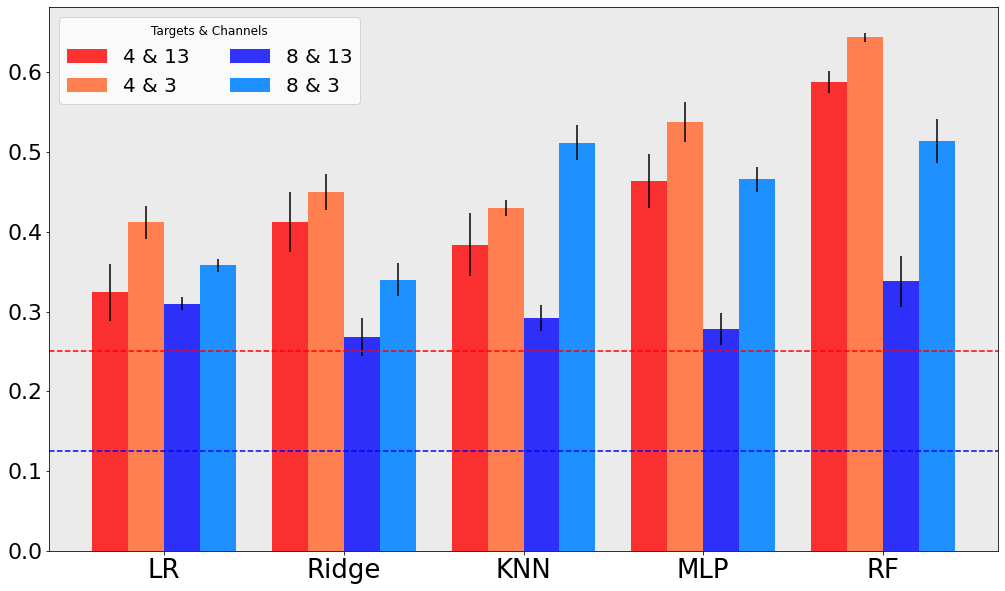

In [36]:
# High freqs, 4 or 8 targets, 3 or 13 channels
targets4_channels_13 = [np.mean(performance_table5[(performance_table5['classifier']=='log') & \
                                                   (performance_table5['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table5[(performance_table5['classifier']=='ridge') & \
                                                   (performance_table5['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table5[(performance_table5['classifier']=='KNN') & \
                                                   (performance_table5['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table5[(performance_table5['classifier']=='MLP') & \
                                                   (performance_table5['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table5[(performance_table5['classifier']=='RF') & \
                                                   (performance_table5['n_channels']==13)]['accuracy'], axis=0)]
targets4_channels_3 = [np.mean(performance_table5[(performance_table5['classifier']=='log') & \
                                                  (performance_table5['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table5[(performance_table5['classifier']=='ridge') & \
                                                   (performance_table5['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table5[(performance_table5['classifier']=='KNN') & \
                                                   (performance_table5['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table5[(performance_table5['classifier']=='MLP') & \
                                                   (performance_table5['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table5[(performance_table5['classifier']=='RF') & \
                                                   (performance_table5['n_channels']==3)]['accuracy'], axis=0)]
targets8_channels_13 = [np.mean(performance_table8[(performance_table8['classifier']=='log') & \
                                                   (performance_table8['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table8[(performance_table8['classifier']=='ridge') & \
                                                   (performance_table8['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table8[(performance_table8['classifier']=='KNN') & \
                                                   (performance_table8['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table8[(performance_table8['classifier']=='MLP') & \
                                                   (performance_table8['n_channels']==13)]['accuracy'], axis=0), \
                        np.mean(performance_table8[(performance_table8['classifier']=='RF') & \
                                                   (performance_table8['n_channels']==13)]['accuracy'], axis=0)]
targets8_channels_3 = [np.mean(performance_table8[(performance_table8['classifier']=='log') & \
                                                  (performance_table8['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table8[(performance_table8['classifier']=='ridge') & \
                                                   (performance_table8['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table8[(performance_table8['classifier']=='KNN') & \
                                                   (performance_table8['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table8[(performance_table8['classifier']=='MLP') & \
                                                   (performance_table8['n_channels']==3)]['accuracy'], axis=0), \
                        np.mean(performance_table8[(performance_table8['classifier']=='RF') & \
                                                   (performance_table8['n_channels']==3)]['accuracy'], axis=0)]

targets4_channels_13_std = [np.std(performance_table5[(performance_table5['classifier']=='log') & \
                                                      (performance_table5['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table5[(performance_table5['classifier']=='ridge') & \
                                                      (performance_table5['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table5[(performance_table5['classifier']=='KNN') & \
                                                      (performance_table5['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table5[(performance_table5['classifier']=='MLP') & \
                                                      (performance_table5['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table5[(performance_table5['classifier']=='RF') & \
                                                      (performance_table5['n_channels']==13)]['accuracy'], axis=0)/sqrt(5)]
targets4_channels_3_std = [np.std(performance_table5[(performance_table5['classifier']=='log') & \
                                                     (performance_table5['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table5[(performance_table5['classifier']=='ridge') & \
                                                     (performance_table5['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table5[(performance_table5['classifier']=='KNN') & \
                                                     (performance_table5['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table5[(performance_table5['classifier']=='MLP') & \
                                                     (performance_table5['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table5[(performance_table5['classifier']=='RF') & \
                                                     (performance_table5['n_channels']==3)]['accuracy'], axis=0)/sqrt(5)]
targets8_channels_13_std = [np.std(performance_table8[(performance_table8['classifier']=='log') & \
                                                      (performance_table8['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table8[(performance_table8['classifier']=='ridge') & \
                                                      (performance_table8['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table8[(performance_table8['classifier']=='KNN') & \
                                                      (performance_table8['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table8[(performance_table8['classifier']=='MLP') & \
                                                      (performance_table8['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                            np.std(performance_table8[(performance_table8['classifier']=='RF') & \
                                                      (performance_table8['n_channels']==13)]['accuracy'], axis=0)/sqrt(5)]
targets8_channels_3_std = [np.std(performance_table8[(performance_table8['classifier']=='log') & \
                                                     (performance_table8['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table8[(performance_table8['classifier']=='ridge') & \
                                                     (performance_table8['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table8[(performance_table8['classifier']=='KNN') & \
                                                     (performance_table8['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table8[(performance_table8['classifier']=='MLP') & \
                                                     (performance_table8['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                           np.std(performance_table8[(performance_table8['classifier']=='RF') & \
                                                     (performance_table8['n_channels']==3)]['accuracy'], axis=0)/sqrt(5)]

bars = ('LR', 'Ridge', 'KNN', 'MLP', 'RF')
fig, ax = plt.subplots(figsize=[17, 10])
width =0.2
ax.set_facecolor('#EBEBEB')
plt.bar(np.arange(len(targets4_channels_13)), targets4_channels_13, width=width, yerr=targets4_channels_13_std, alpha=0.8, color='red')
plt.bar(np.arange(len(targets4_channels_3))+ width, targets4_channels_3, width=width, yerr=targets4_channels_3_std, color='coral')
plt.bar(np.arange(len(targets8_channels_13))+ 2*width, targets8_channels_13, width=width, yerr=targets8_channels_13_std, alpha=0.8, color='blue')
plt.bar(np.arange(len(targets8_channels_3))+ 3*width, targets8_channels_3, width=width, yerr=targets8_channels_3_std, color='dodgerblue')
plt.legend(['4 & 13', '4 & 3', '8 & 13', '8 & 3'],title = "Targets & Channels", loc=2, ncol=2, fontsize=20)
plt.rcParams['legend.title_fontsize'] = 'medium'
plt.xticks(np.arange(len(targets4_channels_3))+ 1.5*width, bars, fontsize = 26)
plt.yticks(fontsize = 22)
plt.axhline(y=0.25, color='red', linestyle='--')
plt.axhline(y=1/8, color='blue', linestyle='--')
plt.show()

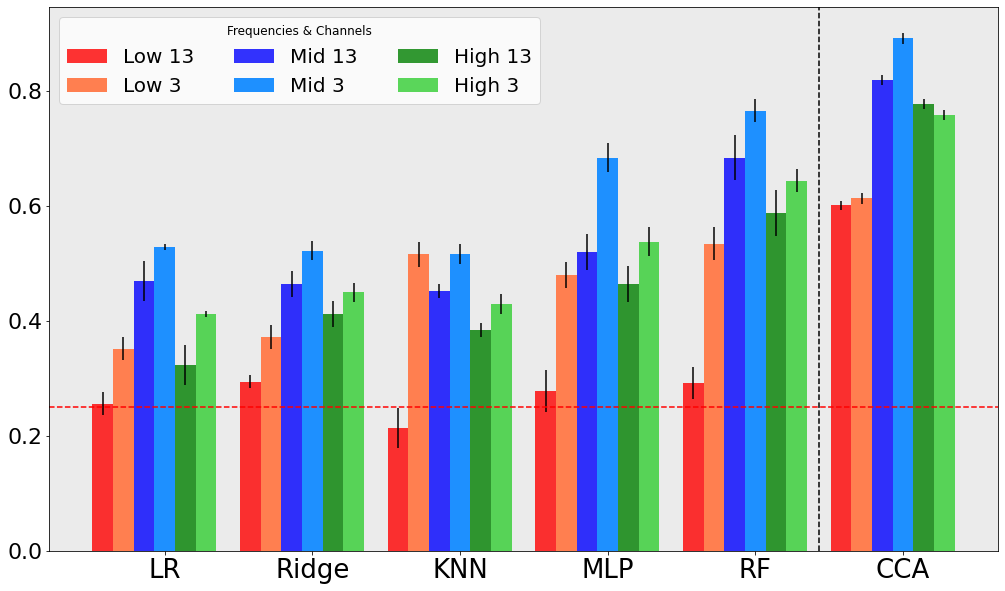

In [37]:
# Low, Mid, High freqs, 3 or 13 channels
low_channels_13 = [np.mean(performance_table2[(performance_table2['classifier']=='log') & \
                                              (performance_table2['n_channels']==13)]['accuracy'], axis=0), \
                   np.mean(performance_table2[(performance_table2['classifier']=='ridge') & \
                                              (performance_table2['n_channels']==13)]['accuracy'], axis=0), \
                   np.mean(performance_table2[(performance_table2['classifier']=='KNN') & \
                                              (performance_table2['n_channels']==13)]['accuracy'], axis=0), \
                   np.mean(performance_table2[(performance_table2['classifier']=='MLP') & \
                                              (performance_table2['n_channels']==13)]['accuracy'], axis=0), \
                   np.mean(performance_table2[(performance_table2['classifier']=='RF') & \
                                              (performance_table2['n_channels']==13)]['accuracy'], axis=0), \
                   accuracy_LOW_13.mean(axis=1)[0]]
low_channels_3 = [np.mean(performance_table2[(performance_table2['classifier']=='log') & \
                                             (performance_table2['n_channels']==3)]['accuracy'], axis=0), \
                  np.mean(performance_table2[(performance_table2['classifier']=='ridge') & \
                                             (performance_table2['n_channels']==3)]['accuracy'], axis=0), \
                  np.mean(performance_table2[(performance_table2['classifier']=='KNN') & \
                                             (performance_table2['n_channels']==3)]['accuracy'], axis=0), \
                  np.mean(performance_table2[(performance_table2['classifier']=='MLP') & \
                                             (performance_table2['n_channels']==3)]['accuracy'], axis=0), \
                  np.mean(performance_table2[(performance_table2['classifier']=='RF') & \
                                             (performance_table2['n_channels']==3)]['accuracy'], axis=0), \
                  accuracy_LOW_3.mean(axis=1)[0]]
mid_channels_13 = [np.mean(performance_table3[(performance_table3['classifier']=='log') & \
                                              (performance_table3['n_channels']==13)]['accuracy'], axis=0), \
                   np.mean(performance_table3[(performance_table3['classifier']=='ridge') & \
                                              (performance_table3['n_channels']==13)]['accuracy'], axis=0), \
                   np.mean(performance_table3[(performance_table3['classifier']=='KNN') & \
                                              (performance_table3['n_channels']==13)]['accuracy'], axis=0), \
                   np.mean(performance_table3[(performance_table3['classifier']=='MLP') & \
                                              (performance_table3['n_channels']==13)]['accuracy'], axis=0), \
                   np.mean(performance_table3[(performance_table3['classifier']=='RF') & \
                                              (performance_table3['n_channels']==13)]['accuracy'], axis=0), \
                   accuracy_MID_13.mean(axis=1)[0]]
mid_channels_3 = [np.mean(performance_table3[(performance_table3['classifier']=='log') & \
                                             (performance_table3['n_channels']==3)]['accuracy'], axis=0), \
                  np.mean(performance_table3[(performance_table3['classifier']=='ridge') & \
                                             (performance_table3['n_channels']==3)]['accuracy'], axis=0), \
                  np.mean(performance_table3[(performance_table3['classifier']=='KNN') & \
                                             (performance_table3['n_channels']==3)]['accuracy'], axis=0), \
                  np.mean(performance_table3[(performance_table3['classifier']=='MLP') & \
                                             (performance_table3['n_channels']==3)]['accuracy'], axis=0), \
                  np.mean(performance_table3[(performance_table3['classifier']=='RF') & \
                                             (performance_table3['n_channels']==3)]['accuracy'], axis=0), \
                  accuracy_MID_3.mean(axis=1)[0]]
high_channels_13 = [np.mean(performance_table5[(performance_table5['classifier']=='log') & \
                                               (performance_table5['n_channels']==13)]['accuracy'], axis=0), \
                    np.mean(performance_table5[(performance_table5['classifier']=='ridge') & \
                                               (performance_table5['n_channels']==13)]['accuracy'], axis=0), \
                    np.mean(performance_table5[(performance_table5['classifier']=='KNN') & \
                                               (performance_table5['n_channels']==13)]['accuracy'], axis=0), \
                    np.mean(performance_table5[(performance_table5['classifier']=='MLP') & \
                                               (performance_table5['n_channels']==13)]['accuracy'], axis=0), \
                    np.mean(performance_table5[(performance_table5['classifier']=='RF') & \
                                               (performance_table5['n_channels']==13)]['accuracy'], axis=0), \
                    accuracy_HIGH_13.mean(axis=1)[0]]
high_channels_3 = [np.mean(performance_table5[(performance_table5['classifier']=='log') & \
                                              (performance_table5['n_channels']==3)]['accuracy'], axis=0), \
                   np.mean(performance_table5[(performance_table5['classifier']=='ridge') & \
                                              (performance_table5['n_channels']==3)]['accuracy'], axis=0), \
                   np.mean(performance_table5[(performance_table5['classifier']=='KNN') & \
                                              (performance_table5['n_channels']==3)]['accuracy'], axis=0), \
                   np.mean(performance_table5[(performance_table5['classifier']=='MLP') & \
                                              (performance_table5['n_channels']==3)]['accuracy'], axis=0), \
                   np.mean(performance_table5[(performance_table5['classifier']=='RF') & \
                                              (performance_table5['n_channels']==3)]['accuracy'], axis=0), \
                   accuracy_HIGH_3.mean(axis=1)[0]]

low_channels_13_std = [np.std(performance_table2[(performance_table2['classifier']=='log') & \
                                                 (performance_table2['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table2[(performance_table2['classifier']=='ridge') & \
                                                 (performance_table2['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table2[(performance_table2['classifier']=='KNN') & \
                                                 (performance_table2['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table2[(performance_table2['classifier']=='MLP') & \
                                                 (performance_table2['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table2[(performance_table2['classifier']=='RF') & \
                                                 (performance_table2['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(accuracy_LOW_13, axis=1)[0]/sqrt(accuracy_LOW_13.shape[1])]
low_channels_3_std = [np.std(performance_table2[(performance_table2['classifier']=='log') & \
                                                (performance_table2['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                      np.std(performance_table2[(performance_table2['classifier']=='ridge') & \
                                                (performance_table2['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                      np.std(performance_table2[(performance_table2['classifier']=='KNN') & \
                                                (performance_table2['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                      np.std(performance_table2[(performance_table2['classifier']=='MLP') & \
                                                (performance_table2['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                      np.std(performance_table2[(performance_table2['classifier']=='RF') & \
                                                (performance_table2['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                      np.std(accuracy_LOW_3, axis=1)[0]/sqrt(accuracy_LOW_3.shape[1])]
mid_channels_13_std = [np.std(performance_table3[(performance_table3['classifier']=='log') & \
                                                 (performance_table3['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table3[(performance_table3['classifier']=='ridge') & \
                                                 (performance_table3['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table3[(performance_table3['classifier']=='KNN') & \
                                                 (performance_table3['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table3[(performance_table3['classifier']=='MLP') & \
                                                 (performance_table3['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table3[(performance_table3['classifier']=='RF') & \
                                                 (performance_table3['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(accuracy_MID_13, axis=1)[0]/sqrt(accuracy_MID_13.shape[1])]
mid_channels_3_std = [np.std(performance_table3[(performance_table3['classifier']=='log') & \
                                                (performance_table3['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                      np.std(performance_table3[(performance_table3['classifier']=='ridge') & \
                                                (performance_table3['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                      np.std(performance_table3[(performance_table3['classifier']=='KNN') & \
                                                (performance_table3['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                      np.std(performance_table3[(performance_table3['classifier']=='MLP') & \
                                                (performance_table3['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                      np.std(performance_table3[(performance_table3['classifier']=='RF') & \
                                                (performance_table3['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                      np.std(accuracy_MID_3, axis=1)[0]/sqrt(accuracy_MID_3.shape[1])]
high_channels_13_std = [np.std(performance_table5[(performance_table5['classifier']=='log') & \
                                                  (performance_table5['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                        np.std(performance_table5[(performance_table5['classifier']=='ridge') & \
                                                  (performance_table5['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                        np.std(performance_table5[(performance_table5['classifier']=='KNN') & \
                                                  (performance_table5['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                        np.std(performance_table5[(performance_table5['classifier']=='MLP') & \
                                                  (performance_table5['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                        np.std(performance_table5[(performance_table5['classifier']=='RF') & \
                                                  (performance_table5['n_channels']==13)]['accuracy'], axis=0)/sqrt(5), \
                        np.std(accuracy_HIGH_13, axis=1)[0]/sqrt(accuracy_HIGH_13.shape[1])]
high_channels_3_std = [np.std(performance_table5[(performance_table5['classifier']=='log') & \
                                                 (performance_table5['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table5[(performance_table5['classifier']=='ridge') & \
                                                 (performance_table5['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table5[(performance_table5['classifier']=='KNN') & \
                                                 (performance_table5['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table5[(performance_table5['classifier']=='MLP') & \
                                                 (performance_table5['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(performance_table5[(performance_table5['classifier']=='RF') & \
                                                 (performance_table5['n_channels']==3)]['accuracy'], axis=0)/sqrt(5), \
                       np.std(accuracy_HIGH_3, axis=1)[0]/sqrt(accuracy_HIGH_3.shape[1])]

bars = ('LR', 'Ridge', 'KNN', 'MLP', 'RF', 'CCA')
fig, ax = plt.subplots(figsize=[17, 10])
width =0.14
ax.set_facecolor('#EBEBEB')
plt.rcParams['legend.title_fontsize'] = 'large'
plt.bar(np.arange(len(low_channels_13)), low_channels_13, width=width, yerr=low_channels_13_std, alpha=0.8, color='red')
plt.bar(np.arange(len(low_channels_3))+width, low_channels_3, width=width, yerr=low_channels_3_std, color='coral')
plt.bar(np.arange(len(mid_channels_13))+2*width, mid_channels_13, width=width, yerr=mid_channels_13_std, alpha=0.8, color='blue')
plt.bar(np.arange(len(mid_channels_3))+3*width, mid_channels_3, width=width, yerr=mid_channels_3_std, color='dodgerblue')
plt.bar(np.arange(len(high_channels_13))+4*width, high_channels_13, width=width, yerr=mid_channels_13_std, alpha=0.8, color='green')
plt.bar(np.arange(len(high_channels_3))+5*width, high_channels_3, width=width, yerr=mid_channels_3_std, alpha=0.8, color='limegreen')
plt.legend(['Low 13', 'Low 3', 'Mid 13', 'Mid 3', 'High 13', 'High 3'],title = "Frequencies & Channels", loc=2, ncol=3, fontsize=20)
plt.xticks(np.arange(len(low_channels_13))+3*width, bars, fontsize = 26)
plt.yticks(fontsize = 22)
plt.axhline(y=0.25, color='red', linestyle='--')
plt.axvline(x=4.85,color='black', linestyle='--')
plt.show()